<h1 style="text-align:center;">Лабораторна робота 5</h1>

<p><b>Тема:</b> OpenCV. Просторові методи обробки зображень. Робота з околом. Просторова фільтрація зображення (short version) </p>
<p><b>Мета:</b> знайомство з просторовими методами фільтрації зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.</p>
<h2 style="text-align:center;">Завдання для самостійної роботи</h2>

<p>1. <a href="https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html">Фільтр з ядром Гауса</a></p>

<p>Фільтрація Гауса використовує двовимірний гаусівський розподіл для розрахунку коефіцієнтів ядра згортки. Значення кожного пікселя обчислюється за формулою:</p>
$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

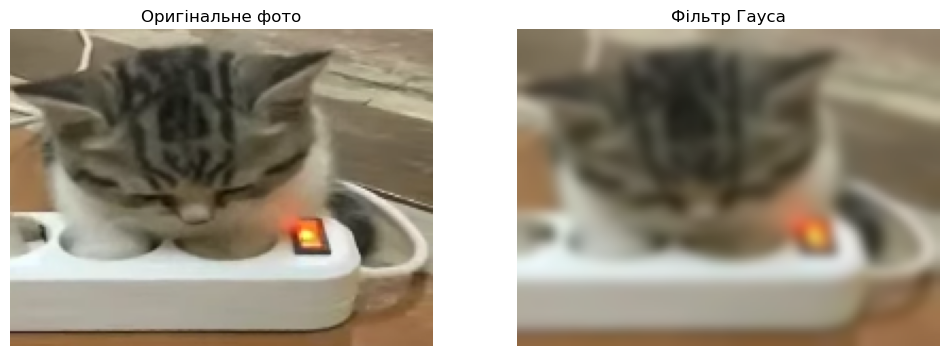

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = 'src/Color.png' 
image = cv2.imread(filename)

if image is None:
    print(f"Не вдалося знайти файл! {filename}")
else:
    kernel_size = (15, 15)
    gaussian_blur = cv2.GaussianBlur(image, kernel_size, 0)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title("Оригінальне фото")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if len(gaussian_blur.shape) == 3:
        plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(gaussian_blur, cmap='gray')
    plt.title("Фільтр Гауса")
    plt.axis('off')

    plt.show()
    
    cv2.imwrite('src/Color_gaussa.png', gaussian_blur)

<p>Написати процедуру, яка б зашумлювала нормальним шумом з параметрами $(n, \mu, \sigma)$ зображення</p>

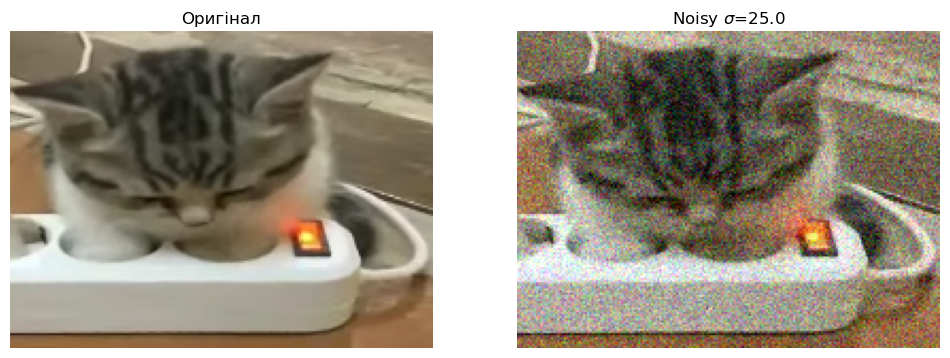

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def add_gaussian_noise(image: np.ndarray, mu: float = 0.0, sigma: float = 10.0) -> np.ndarray:
    img_f = image.astype(np.float32)
    noise = np.random.normal(mu, sigma, img_f.shape).astype(np.float32)
    return np.clip(img_f + noise, 0, 255).astype(np.uint8)
filename = 'src/Color.png'
img = cv.imread(filename)

if img is None:
    print(f"Не вдалося знайти файл! {filename}")
else:
    mu, sigma = 0.0, 25.0
    noisy = add_gaussian_noise(img, mu, sigma)
    plt.figure(figsize=(12, 6))
    show_orig = cv.cvtColor(img, cv.COLOR_BGR2RGB) if len(img.shape) == 3 else img
    show_noisy = cv.cvtColor(noisy, cv.COLOR_BGR2RGB) if len(noisy.shape) == 3 else noisy
    cmap = None if len(img.shape) == 3 else 'gray'

    plt.subplot(1, 2, 1); plt.imshow(show_orig, cmap=cmap); plt.title('Оригінал'); plt.axis('off')
    plt.subplot(1, 2, 2); plt.imshow(show_noisy, cmap=cmap); plt.title(rf'Noisy $\sigma$={sigma}'); plt.axis('off')
    
    plt.show()
    cv.imwrite(f'src/Color_noise_sigma.png', noisy)

<p>Взявши за основу власний портрет, зашумити його нормальним шумом</p>

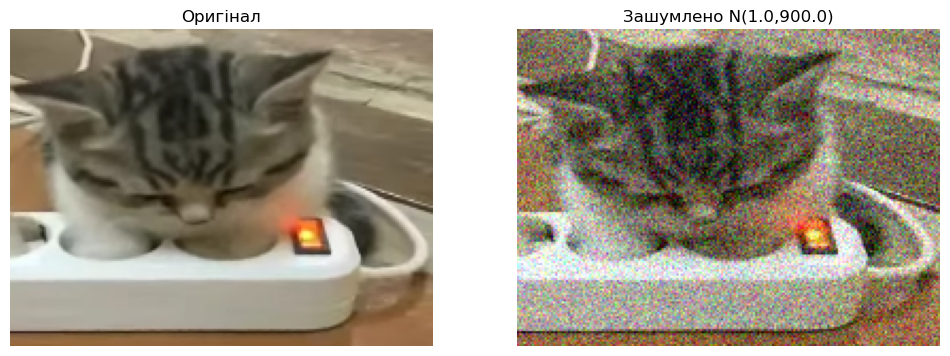

True

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt

portrait_path = 'src/Color.png'
img = cv.imread(portrait_path)
if img is None:
    raise FileNotFoundError(portrait_path)

mu = 1.0
sigma = 30.0

noisy_img = add_gaussian_noise(img, mu=mu, sigma=sigma)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title('Оригінал'); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(noisy_img, cv.COLOR_BGR2RGB)); plt.title(f'Зашумлено N({mu},{sigma**2})'); plt.axis('off')
plt.show()
cv.imwrite(f'src/Color_noise.png', noisy)

<p>Реалізувати медіанний фільтр і продемонструвати послідовно роботу медіанного і гаусового фільтру, оптимально підібравши і обґрунтувавши значення параметрів</p>

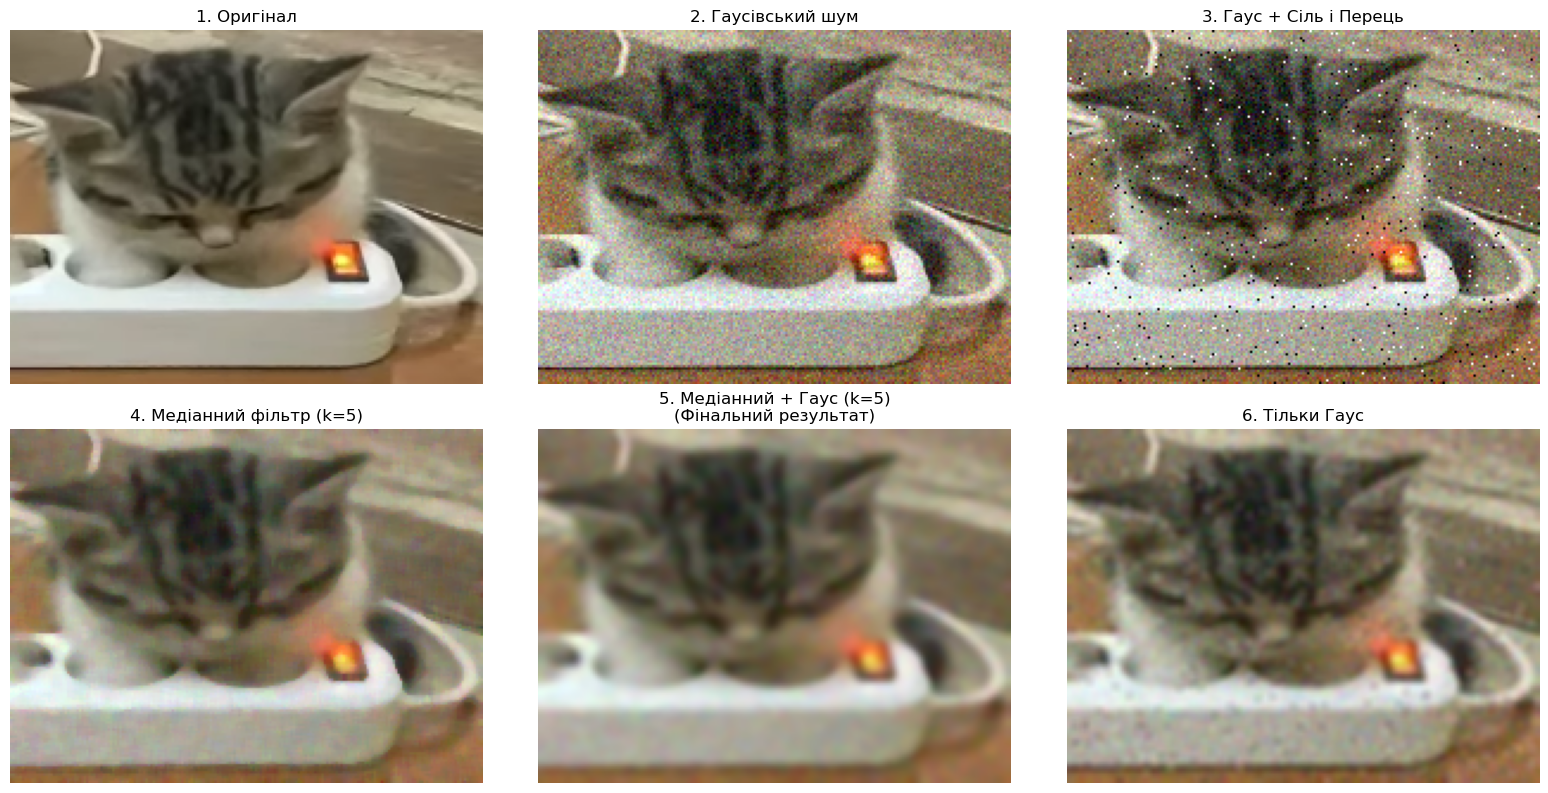

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image: np.ndarray, mu: float = 0.0, sigma: float = 10.0) -> np.ndarray:
    img_f = image.astype(np.float32)
    noise = np.random.normal(mu, sigma, img_f.shape).astype(np.float32)
    return np.clip(img_f + noise, 0, 255).astype(np.uint8)
def median_filter(image: np.ndarray, ksize: int) -> np.ndarray:
    assert ksize % 2 == 1
    if image.ndim == 2:
        return cv.medianBlur(image, ksize)
    else:
        chans = cv.split(image)
        filtered = [cv.medianBlur(c, ksize) for c in chans]
        return cv.merge(filtered)

if __name__ == "__main__":
    portrait_path = 'src/Color.png' 
    img = cv.imread(portrait_path)
    
    if img is None:
        print(f"Не знайдено файл! {portrait_path}")
    else:
        noisy_gauss = add_gaussian_noise(img, sigma=20.0)
        sp = noisy_gauss.copy()
        prob = 0.02 
        rnd = np.random.rand(*sp.shape[:2])
        sp[rnd < prob/2] = 255
        mask_pepper = (rnd > 1 - prob/2)
        sp[mask_pepper] = 0
        med_ksize = 5      
        gauss_ksize = 5
        gauss_sigma = 1.5
        med_result = median_filter(sp, med_ksize)
        final_result = cv.GaussianBlur(med_result, (gauss_ksize, gauss_ksize), gauss_sigma)       
        only_gauss = cv.GaussianBlur(sp, (gauss_ksize, gauss_ksize), gauss_sigma)
        
        plt.figure(figsize=(16, 8))

   
        plt.subplot(2, 3, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title('1. Оригінал')
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(cv.cvtColor(noisy_gauss, cv.COLOR_BGR2RGB))
        plt.title('2. Гаусівський шум')
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.imshow(cv.cvtColor(sp, cv.COLOR_BGR2RGB))
        plt.title('3. Гаус + Сіль і Перець')
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.imshow(cv.cvtColor(med_result, cv.COLOR_BGR2RGB))
        plt.title(f'4. Медіанний фільтр (k={med_ksize})')
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.imshow(cv.cvtColor(final_result, cv.COLOR_BGR2RGB))
        plt.title(f'5. Медіанний + Гаус (k={gauss_ksize})\n(Фінальний результат)')
        plt.axis('off')

        plt.subplot(2, 3, 6)
        plt.imshow(cv.cvtColor(only_gauss, cv.COLOR_BGR2RGB))
        plt.title('6. Тільки Гаус')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        cv.imwrite('src/Color_restore_combo.png', final_result)

<p>Якщо на зображенні присутній імпульсний шум, варто почати з медіанного фільтра з вікном k=3 або k=5. Значення k=3 майже не зачіпає дрібні деталі, тоді як k=5 ефективніше прибирає шум, але може розмивати дрібні елементи.</p> <p>Після медіанного фільтрування можна застосувати гаусівський фільтр, щоб усунути залишки звичайного шуму. Типовий стартовий варіант — ядро 5×5 та sigma приблизно 1.0.</p>

<p>2. <a href="https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html">Двосторонній фільтр</a></p>

Формула: 
$$
g(x, y) = \frac{1}{W_p} \sum_{x_i, y_i \in \Omega} f(x_i, y_i) \cdot G_{\sigma_s}(\| (x,y) - (x_i,y_i) \|) \cdot G_{\sigma_r}(| f(x,y) - f(x_i,y_i) |)
$$

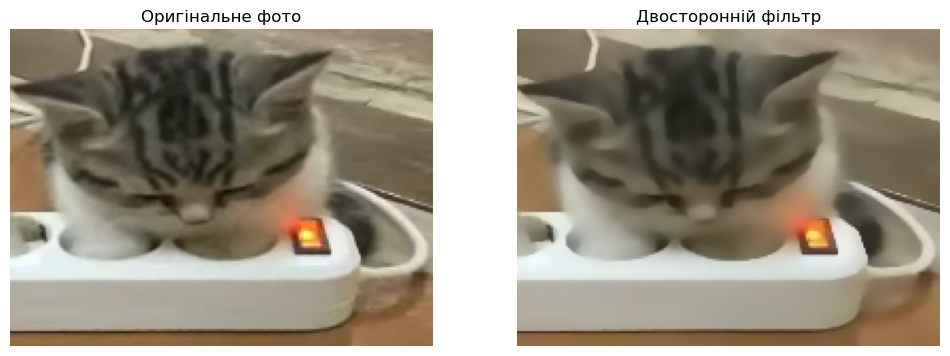

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Шлях до файлу
filename = 'src/Color.png' 
image = cv2.imread(filename)

if image is None:
    print(f"Не вдалося знайти файл! {filename}")
else:
    bilateral_filter = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title("Оригінальне фото")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if len(bilateral_filter.shape) == 3:
        plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(bilateral_filter, cmap='gray')
    plt.title("Двосторонній фільтр")
    plt.axis('off')
    plt.show()
    
    cv2.imwrite('src/Color_bilateral.png', bilateral_filter)

Написати процедуру, до складу якої б входили всі низькочастотні фільтри, які досліджуються в цій лабораторній роботі, а вибір потрібного задавався відповідним вхідним параметром.

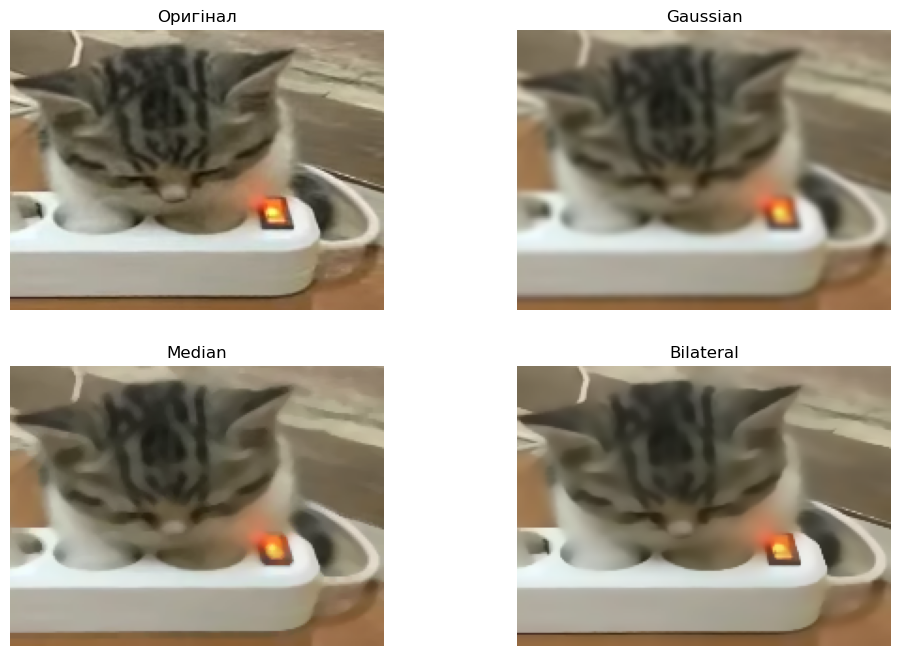

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2)))
    return g / g.sum()
def apply_convolution(image, kernel):
    return cv.filter2D(image, -1, kernel)
def median_filter(image, ksize):
    return cv.medianBlur(image, ksize)
def bilateral_filter(image, d, sigmaColor, sigmaSpace):
    return cv.bilateralFilter(image, d, sigmaColor, sigmaSpace)
def lowpass_filter_dispatch(image: np.ndarray, method: str, **kwargs) -> np.ndarray:
    method = method.lower()    
    if method == 'gaussian_manual':
        ksize = kwargs.get('ksize', 5)
        sigma = kwargs.get('sigma', 1.0)
        kernel = gaussian_kernel(ksize, sigma)
        return apply_convolution(image, kernel)
    elif method == 'gaussian_cv':
        ksize = kwargs.get('ksize', 5)
        sigma = kwargs.get('sigma', 1.0)
        return cv.GaussianBlur(image, (ksize, ksize), sigmaX=sigma, borderType=cv.BORDER_REPLICATE)
    elif method == 'median':
        ksize = kwargs.get('ksize', 3)
        return median_filter(image, ksize)
    elif method == 'bilateral':
        d = kwargs.get('d', 9)
        sigmaColor = kwargs.get('sigmaColor', 75)
        sigmaSpace = kwargs.get('sigmaSpace', 75)
        return bilateral_filter(image, d, sigmaColor, sigmaSpace)
    elif method == 'average':
        ksize = kwargs.get('ksize', 3)
        return cv.blur(image, (ksize, ksize))
    else:
        raise ValueError(f"Невідомий метод! {method}")

if __name__ == "__main__":
    portrait_path = 'src/Color.png'
    img = cv.imread(portrait_path)
    
    if img is None:
        print(f"Помилка! {portrait_path}")
    else:
        out1 = lowpass_filter_dispatch(img, 'gaussian_cv', ksize=7, sigma=1.5)
        out2 = lowpass_filter_dispatch(img, 'median', ksize=5)
        out3 = lowpass_filter_dispatch(img, 'bilateral', d=9, sigmaColor=75, sigmaSpace=75)

        plt.figure(figsize=(12,8))
        
        # Функція для конвертації кольорів (щоб скоротити код)
        def show(img):
            return cv.cvtColor(img, cv.COLOR_BGR2RGB) if len(img.shape) == 3 else img

        plt.subplot(2,2,1); plt.imshow(show(img)); plt.title('Оригінал'); plt.axis('off')
        plt.subplot(2,2,2); plt.imshow(show(out1)); plt.title('Gaussian'); plt.axis('off')
        plt.subplot(2,2,3); plt.imshow(show(out2)); plt.title('Median'); plt.axis('off')
        plt.subplot(2,2,4); plt.imshow(show(out3)); plt.title('Bilateral'); plt.axis('off')
        
        plt.show()

<h2 style="font-weight:bold; font-size:22px;">Контрольні запитання</h2>

<h>1. У чому полягає сенс градаційних перетворень?</h>

<p>Градаційні перетворення — це методи, що змінюють яскравість чи контраст зображення шляхом перетворення значень пікселів за певною функцією.</p> <p>Вони використовуються для:</p> <ol> <li>Покращення зовнішнього вигляду зображення (збільшення контрастності, освітлення або затемнення, розширення діапазону яскравостей).</li> <li>Підготовки зображення до подальших обчислень (виділення меж, уточнення деталей, сегментація).</li> <li>Компенсації недоліків умов зйомки (пересвіт, недосвіт, знижений контраст).</li> <li>Уніфікації рівнів інтенсивності для алгоритмів комп'ютерного зору.</li> </ol> <p>Основні приклади градаційних перетворень:</p> <li>створення негативу.</li><li>гамма-корекція;</li><li>лінійне розширення контрасту;</li><li>логарифмічні та експоненційні перетворення;</li><br>

<h>2. На чому ґрунтуються гістограмні методи?</h>

<p>Гістограмні методи базуються на аналізі та зміні гістограми інтенсивностей — графічного відображення частоти появи певних значень яскравості чи кольору.</p> <p>Їхня суть полягає у зміні розподілу яскравостей так, щоб:</p> <li>розширити або вирівняти гістограму,</li> <li>регулювати контраст,</li> <li>компенсувати нерівномірне освітлення.</li><br> <p>Основні принципи роботи:</p> <li>Якщо гістограма надто вузька — контраст низький, тому її варто розширити.</li> <li>Нерівномірний розподіл можна зробити більш рівним.</li> <li>За необхідності досягти подібного тону, як у зображення-еталона, застосовується специфікація гістограми.</li><br> <p>Приклади гістограмних методів:</p> <li>Гістограмне вирівнювання (histogram equalization) — робить контраст більш однорідним.</li> <li>CLAHE — локальне підвищення контрастності з обмеженням посилення.</li> <li>Специфікація (matching) — підлаштування під потрібну гістограму.</li>